In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/content/petrol_consumption.csv')

In [3]:
df.shape

(48, 5)

In [4]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [6]:
df['Population_Driver_licence(%)']=df['Population_Driver_licence(%)']*100

In [7]:
X = df.drop(['Petrol_Consumption'],axis=1)
y = df['Petrol_Consumption']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
dtc = DecisionTreeRegressor(max_depth=3,max_features=4)
dtc.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features=4)

In [11]:
predictions = dtc.predict(X_test)

In [12]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df.head(5)

,Actual,Predicted
18,865,782.000000
13,508,658.333333
26,577,604.666667
31,554,658.333333
10,580,535.000000


In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2_score:', metrics.r2_score(y_test,predictions))

Mean Absolute Error: 87.4666666666667
Mean Squared Error: 12638.711111111108
Root Mean Squared Error: 112.42202235821551
r2_score: 0.4531962056714951


In [14]:
dot_data = export_graphviz(dtc, filled=True, rounded=True, feature_names=X.columns, out_file=None)

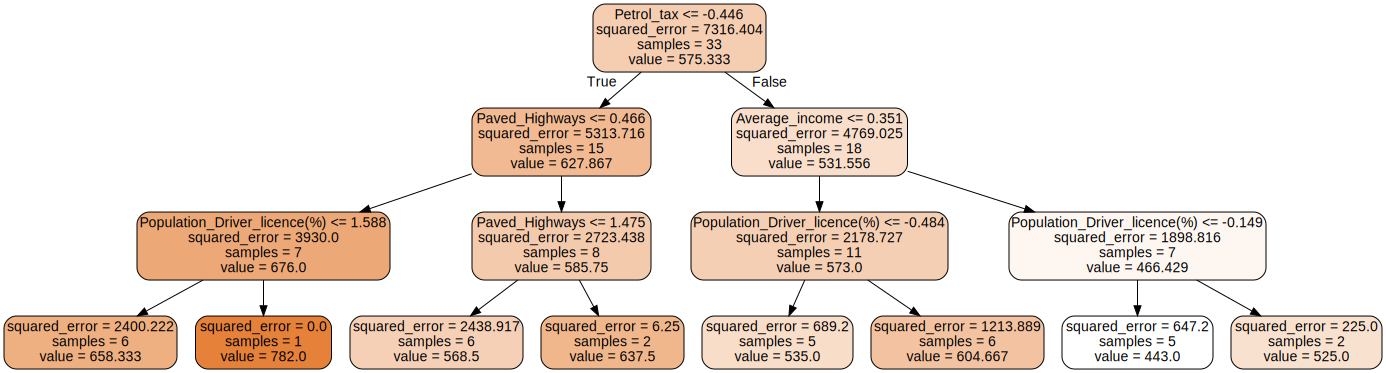

In [15]:
graphviz.Source(dot_data)

In [16]:
param_grid = [{"max_depth":[3,4,5, None], "max_features":[3,4,5,6,7]}]

In [17]:
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),param_grid = param_grid,cv=10)

In [18]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [3, 4, 5, 6, 7]}])

In [19]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': 6},
 {'max_depth': 3, 'max_features': 7},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': 6},
 {'max_depth': 4, 'max_features': 7},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': 6},
 {'max_depth': 5, 'max_features': 7},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': 6},
 {'max_depth': None, 'max_features': 7}]

In [20]:
gs.cv_results_['rank_test_score']

array([ 6,  1,  1,  1,  1,  5,  9,  9,  9,  9,  7, 13, 13, 13, 13,  8, 17,
       17, 17, 17], dtype=int32)

In [21]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=4, random_state=123)

In [22]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df.head(5)

,Actual,Predicted
18,865,782.000000
13,508,658.333333
26,577,604.666667
31,554,658.333333
10,580,535.000000


In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2_score:', metrics.r2_score(y_test,predictions))

Mean Absolute Error: 87.4666666666667
Mean Squared Error: 12638.711111111108
Root Mean Squared Error: 112.42202235821551
r2_score: 0.4531962056714951


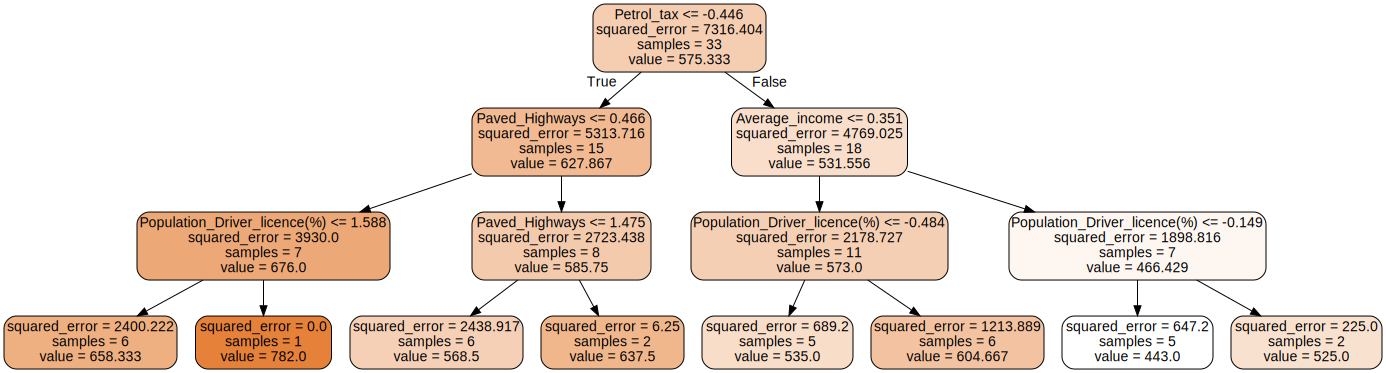

In [24]:
dot_data = export_graphviz(dtc, filled=True, rounded=True, feature_names=X.columns, out_file=None)
graphviz.Source(dot_data)